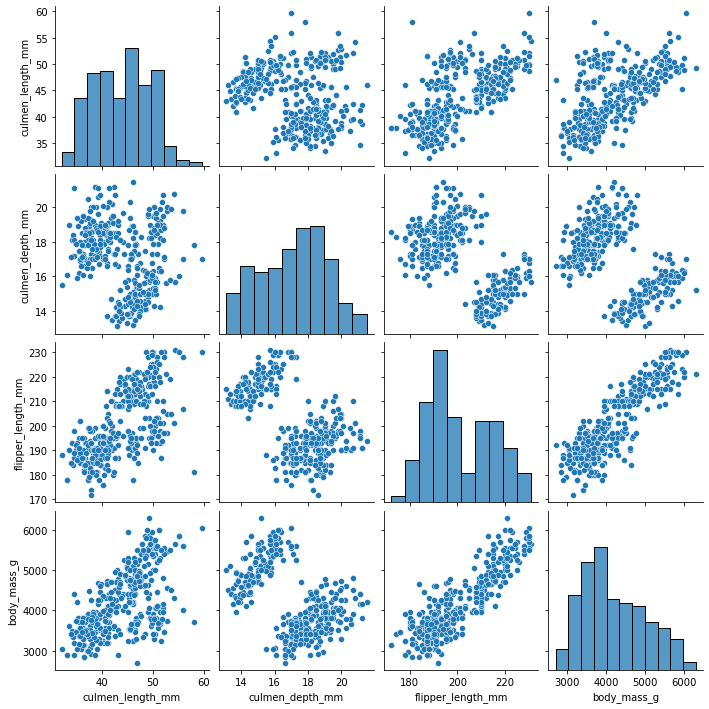

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv('penguins_size.csv')

sns.pairplot(df)

In [2]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [9]:
#mi objetivo, es sexar pinguinos de una dada especie, mediante el uso de regresion logistica

adelie = df[(df['species']=='Adelie')].loc[: , ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 
'body_mass_g', 'sex']]

chin = df[(df['species']=='Chinstrap')].loc[: , ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 
'body_mass_g', 'sex']]

gentoo = df[(df['species']=='Gentoo')].loc[: , ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 
'body_mass_g', 'sex']]

In [11]:
adelie.isna().any()

culmen_length_mm     True
culmen_depth_mm      True
flipper_length_mm    True
body_mass_g          True
sex                  True
dtype: bool

In [12]:
chin.isna().any()

culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [13]:
gentoo.isna().any()

culmen_length_mm     True
culmen_depth_mm      True
flipper_length_mm    True
body_mass_g          True
sex                  True
dtype: bool

In [ ]:
#como varios individuos no tienen sexo definido(nan o '-') hay que limpiarlo, vamos a comenzar a trabajar
#con los chinstrap, que son los unicos sin nan

In [14]:
chin['sex'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [15]:
#tampoco tiene valores nulos, o simbolos no informativos

#primero cambio los valores, para pdoer usar regresion logistica

#la funcion CerosUnos(dataframe , columna) toma un df y una col, y le aplica a esa col la conversion de
#female a 1 , y de male a 0

def CerosUnos(dataframe , columna):
    
    dataframe[columna] = dataframe[columna].map({'FEMALE':1 , 'MALE':0})
    
    return(dataframe)

CerosUnos(chin , 'sex')

chin['sex']

#from sklearn.linear_model import LogisticRegression



152    1
153    0
154    0
155    1
156    0
      ..
215    0
216    1
217    0
218    0
219    1
Name: sex, Length: 68, dtype: int64

In [18]:
def ratio(dataframe , columna1 , columna2):
    
    dataframe['culmen_ratio'] = dataframe[columna1]/dataframe[columna2]
    
    return(dataframe)

ratio(chin , 'culmen_length_mm' , 'culmen_depth_mm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio
152,46.5,17.9,192.0,3500.0,1,2.597765
153,50.0,19.5,196.0,3900.0,0,2.564103
154,51.3,19.2,193.0,3650.0,0,2.671875
155,45.4,18.7,188.0,3525.0,1,2.427807
156,52.7,19.8,197.0,3725.0,0,2.661616
...,...,...,...,...,...,...
215,55.8,19.8,207.0,4000.0,0,2.818182
216,43.5,18.1,202.0,3400.0,1,2.403315
217,49.6,18.2,193.0,3775.0,0,2.725275
218,50.8,19.0,210.0,4100.0,0,2.673684


In [19]:
chin

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio
152,46.5,17.9,192.0,3500.0,1,2.597765
153,50.0,19.5,196.0,3900.0,0,2.564103
154,51.3,19.2,193.0,3650.0,0,2.671875
155,45.4,18.7,188.0,3525.0,1,2.427807
156,52.7,19.8,197.0,3725.0,0,2.661616
...,...,...,...,...,...,...
215,55.8,19.8,207.0,4000.0,0,2.818182
216,43.5,18.1,202.0,3400.0,1,2.403315
217,49.6,18.2,193.0,3775.0,0,2.725275
218,50.8,19.0,210.0,4100.0,0,2.673684


In [21]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(

chin.loc[: , ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g' , 'culmen_ratio']] ,
chin.loc[:,['sex']],

test_size = 0.2 , random_state = 524)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(54, 5) (14, 5) (54, 1) (14, 1)


In [24]:
import numpy as np

In [27]:
#pienso hacer una regresion logistica para culmen_length , culmen depth , flipper_ length , body_mass ,
#culmen_ratio , por separado, y luego tomar alguna desicion

from sklearn.linear_model import LogisticRegression

reg_largo_pico = LogisticRegression()

reg_profundidad_pico = LogisticRegression()

reg_ratio_pico = LogisticRegression()

reg_largo_aleta = LogisticRegression()

reg_masa = LogisticRegression()

reg_largo_pico.fit(np.asarray(X_train['culmen_length_mm']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_profundidad_pico.fit(np.asarray(X_train['culmen_depth_mm']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_ratio_pico.fit(np.asarray(X_train['culmen_ratio']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_largo_aleta.fit(np.asarray(X_train['flipper_length_mm']).reshape(-1 , 1) , np.asarray(y_train).ravel())

reg_masa.fit(np.asarray(X_train['body_mass_g']).reshape(-1 , 1) , np.asarray(y_train).ravel())
#hasta aca fitie todos los modelos, queda usarlos, y graficar

LogisticRegression()

In [ ]:
#entonces ahora, ya puedo predecir las probabilidades, para graficar un poco

In [29]:
largo_pico_proba = reg_largo_pico.predict_proba(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1))

profundidad_pico_proba = reg_profundidad_pico.predict_proba(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1))

ratio_pico_proba = reg_ratio_pico.predict_proba(np.asarray(X_test['culmen_ratio']).reshape(-1 , 1))

largo_aleta_proba = reg_largo_aleta.predict_proba(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1))

masa_proba = reg_masa.predict_proba(np.asarray(X_test['body_mass_g']).reshape(-1 , 1))

In [ ]:
#ahora grafico

In [33]:
largo_pico_proba

array([[0.1533191 , 0.8466809 ],
       [0.91469277, 0.08530723],
       [0.07309141, 0.92690859],
       [0.19678724, 0.80321276],
       [0.63610373, 0.36389627],
       [0.01367517, 0.98632483],
       [0.82360822, 0.17639178],
       [0.26335291, 0.73664709],
       [0.91469277, 0.08530723],
       [0.65341159, 0.34658841],
       [0.77533441, 0.22466559],
       [0.05914073, 0.94085927],
       [0.58218834, 0.41781166],
       [0.87201237, 0.12798763]])

In [34]:
largo_pico_proba[:,1]

array([0.8466809 , 0.08530723, 0.92690859, 0.80321276, 0.36389627,
       0.98632483, 0.17639178, 0.73664709, 0.08530723, 0.34658841,
       0.22466559, 0.94085927, 0.41781166, 0.12798763])

In [1]:
plt.plot(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1), largo_pico_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1), largo_pico_proba[:, 0], "b--", label="Male")
#plt.plot(y_test , ".")

NameError: name 'plt' is not defined

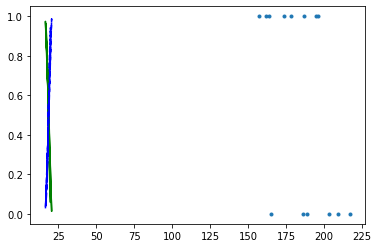

In [42]:
plt.plot(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1), profundidad_pico_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1), profundidad_pico_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

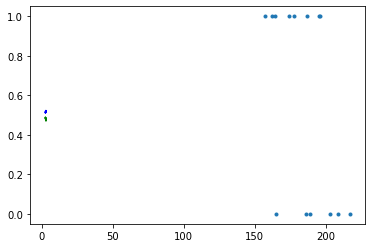

In [43]:
plt.plot(np.asarray(X_test['culmen_ratio']).reshape(-1 , 1), ratio_pico_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['culmen_ratio']).reshape(-1 , 1), ratio_pico_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

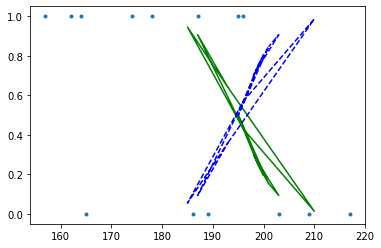

In [44]:
plt.plot(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1), largo_aleta_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1), largo_aleta_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

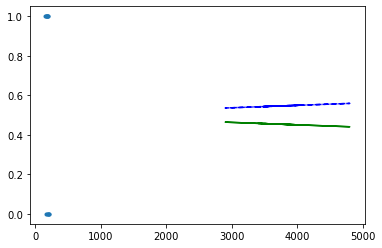

In [45]:
plt.plot(np.asarray(X_test['body_mass_g']).reshape(-1 , 1), masa_proba[:, 1], "g-", label="Female")
plt.plot(np.asarray(X_test['body_mass_g']).reshape(-1 , 1), masa_proba[:, 0], "b--", label="Male")
plt.plot(y_test , ".")

In [46]:
#otra cosa que puedo hacer es graficar los preditcc, con los puntos originales, a ver como sale eso..

#usando .predict

largo_pico_pred = reg_largo_pico.predict(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1))

profundidad_pico_pred = reg_profundidad_pico.predict(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1))

ratio_pico_pred = reg_ratio_pico.predict(np.asarray(X_test['culmen_ratio']).reshape(-1 , 1))

largo_aleta_pred = reg_largo_aleta.predict(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1))

masa_pred = reg_masa.predict(np.asarray(X_test['body_mass_g']).reshape(-1 , 1))

In [47]:
largo_pico_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

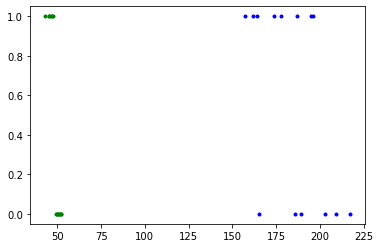

In [52]:
plt.plot(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1), largo_pico_pred , "g.", label="Female")
#plt.plot(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1), largo_pico_pred[:, 0], "b--", label="Male")
plt.plot(y_test , "b.")

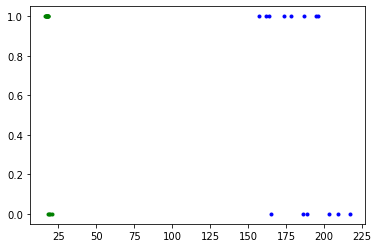

In [53]:
plt.plot(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1), profundidad_pico_pred , "g.")
#plt.plot(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1), largo_pico_pred[:, 0], "b--", label="Male")
plt.plot(y_test , "b.")

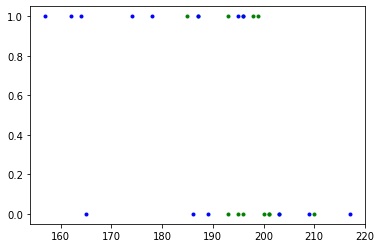

In [54]:
plt.plot(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1), largo_pico_pred , "g.")
#plt.plot(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1), largo_pico_pred[:, 0], "b--", label="Male")
plt.plot(y_test , "b.")

In [58]:
print(X_test['flipper_length_mm'].shape, largo_pico_pred.shape , y_test.shape)

(14,) (14,) (14, 1)


In [60]:
print(np.asarray(X_test['flipper_length_mm']).reshape(-1,1).shape, np.asarray(largo_pico_pred).reshape(-1,1).shape , np.asarray(y_test).reshape(-1,1).shape)

(14, 1) (14, 1) (14, 1)


In [61]:
print(X_test['flipper_length_mm'].shape, largo_pico_pred.shape , y_test.shape)

(14,) (14,) (14, 1)


In [ ]:
#a ver si arreglo algo

#np.asarray(X_test['flipper_length_mm']).reshape(-1,1)

#np.asarray(largo_pico_pred).reshape(-1,1)

#np.asarray(y_test).reshape(-1,1)

In [69]:
(X_test['flipper_length_mm'])

162    193.0
189    210.0
195    196.0
164    185.0
217    193.0
174    187.0
196    196.0
187    199.0
165    201.0
186    195.0
178    200.0
157    198.0
209    203.0
203    201.0
Name: flipper_length_mm, dtype: float64

In [74]:
#voy a evaluar los scores de las regresiones logisticas

In [77]:
reg_largo_pico.score(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))



0.8571428571428571

In [79]:
reg_profundidad_pico.score(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))




0.8571428571428571

In [81]:
reg_ratio_pico.score(np.asarray(X_test['culmen_ratio']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))



0.42857142857142855

In [82]:
reg_largo_aleta.score(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))



0.5

In [83]:
reg_masa.score(np.asarray(X_test['body_mass_g']).reshape(-1 , 1) ,np.asarray(y_test).reshape(-1,1))

0.42857142857142855

In [84]:
score_long_pico = reg_largo_pico.score(np.asarray(X_test['culmen_length_mm']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))

score_prof_pico = reg_profundidad_pico.score(np.asarray(X_test['culmen_depth_mm']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))

score_ratio_pico = reg_ratio_pico.score(np.asarray(X_test['culmen_ratio']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))

score_aleta = reg_largo_aleta.score(np.asarray(X_test['flipper_length_mm']).reshape(-1 , 1) , np.asarray(y_test).reshape(-1,1))

score_masa = reg_masa.score(np.asarray(X_test['body_mass_g']).reshape(-1 , 1) ,np.asarray(y_test).reshape(-1,1))

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

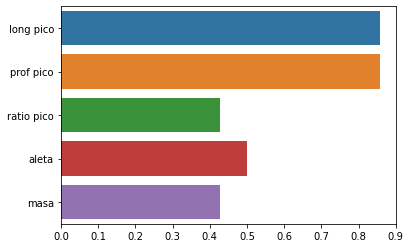

In [85]:
lista_score = [score_long_pico , score_prof_pico , score_ratio_pico , score_aleta , score_masa]

lista_barras = ['long pico' , 'prof pico' , 'ratio pico' , 'aleta' , 'masa']

sns.barplot(lista_score , lista_barras)

In [ ]:
#a juzgar por score, solo vale la pena usar 'culmen_depth_mm' , 'culmen_length_mm',

In [94]:
#para el softmax, voy a usar los features  , 'culmen_depth_mm' , 'culmen_length_mm',
#softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
#softmax_reg.fit(X, y)

X_soft_train = X_train.loc[: , ['culmen_depth_mm' , 'culmen_length_mm']]

X_soft_test = X_test.loc[: , ['culmen_depth_mm' , 'culmen_length_mm']]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1)

softmax_reg.fit((X_soft_train) , np.asarray(y_train).ravel())

softmax_reg.score(X_soft_test , y_test)

0.8571428571428571

In [ ]:
#no mejora demasiado, pero va bien

In [95]:
softmax_reg_c10 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

softmax_reg_c10.fit(X_soft_train, np.asarray(y_train).ravel())


softmax_reg_c100 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=100)

softmax_reg_c100.fit(X_soft_train, np.asarray(y_train).ravel())


softmax_reg_c1000 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1000)

softmax_reg_c1000.fit(X_soft_train, np.asarray(y_train).ravel())


softmax_reg_c01 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.1)

softmax_reg_c01.fit(X_soft_train, np.asarray(y_train).ravel())


softmax_reg_c001 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.01)

softmax_reg_c001.fit(X_soft_train, np.asarray(y_train).ravel())



softmax_reg_c0001 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.001)

softmax_reg_c0001.fit(X_soft_train, np.asarray(y_train).ravel())



print(softmax_reg_c0001.score(X_soft_test , y_test) , softmax_reg_c001.score(X_soft_test , y_test),
softmax_reg_c01.score(X_soft_test , y_test) , softmax_reg_c1000.score(X_soft_test , y_test),
softmax_reg_c100.score(X_soft_test , y_test) , softmax_reg_c10.score(X_soft_test , y_test))

0.8571428571428571 0.8571428571428571 0.8571428571428571 0.8571428571428571 0.8571428571428571 0.8571428571428571


/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

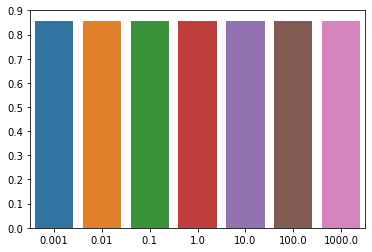

In [98]:
lista_softmax = [softmax_reg_c0001.score(X_soft_test , y_test) ,
softmax_reg_c001.score(X_soft_test , y_test),
softmax_reg_c01.score(X_soft_test , y_test) , softmax_reg.score(X_soft_test , y_test) ,
softmax_reg_c10.score(X_soft_test , y_test) , 
softmax_reg_c100.score(X_soft_test , y_test),softmax_reg_c1000.score(X_soft_test , y_test)]

lista_C = [0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000]

sns.barplot(lista_C , lista_softmax)